## KNN
#### 필요한 패키지를 불러온다:

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing
from scipy.stats import itemfreq

#### 데이터를 불러온다:

In [3]:
os.chdir(r"C:\Users\bit\Desktop\머신러닝 알고리즘과 응용 2\data")

In [4]:
# df = pd.read_csv('data_spam.csv', header='infer',encoding='ISO-8859-1')
df = pd.read_csv('data_spam.csv', header='infer',encoding='latin1')

In [5]:
df.shape

(1000, 63)

In [6]:
df.head(5)

,email_id,is_spam,word_freq_will,word_freq_original,word_freq_415,word_freq_mail,char_freq_#,char_freq_$,word_freq_internet,word_freq_edu,...,word_freq_receive,word_freq_000,capital_run_length_average,word_freq_address,word_freq_george,word_freq_cs,word_freq_random,word_freq_conference,word_freq_technology,char_freq_(
0,3227,no,1.06,0.26,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,2.646,0.00,0.0,0.0,0,0.0,0.00,0.039
1,2331,no,0.00,0.00,0.0,1.40,0.0,0.00,0.00,0.0,...,0.00,0.00,3.875,0.00,1.4,0.0,0,0.0,0.00,0.220
2,1899,yes,0.42,0.00,0.0,0.42,0.0,0.39,0.00,0.0,...,0.42,3.38,26.405,0.00,0.0,0.0,0,0.0,0.42,0.097
3,1387,no,0.00,0.00,0.0,0.00,0.0,0.00,2.07,0.0,...,0.00,0.00,1.523,0.00,0.0,0.0,0,0.0,0.00,0.144
4,3555,no,1.94,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,1.197,0.27,0.0,0.0,0,0.0,0.00,0.000


In [7]:
X=np.array(df.drop(columns=['is_spam', 'email_id'])) # 스팸빼고
Y=np.array(df.is_spam) # 스팸
header = df.columns
headerX = df.drop(columns=['is_spam', 'email_id']).columns

#### 통계적 요약과 시각화:

D:\Users\bit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """Entry point for launching an IPython kernel.


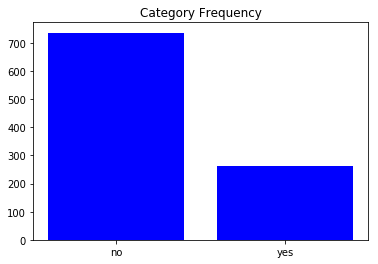

array([['no', 736],
       ['yes', 264]], dtype=object)

In [8]:
table = itemfreq(Y)
plt.bar(table[:,0],table[:,1],color = 'blue')
plt.title('Category Frequency')
plt.show()
table

'yes', 'no' 레이블을 숫자로 변환:

In [9]:
Y = LE.fit_transform(Y)

NameError: name 'LE' is not defined

In [10]:
table = itemfreq(Y)
table

D:\Users\bit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """Entry point for launching an IPython kernel.


array([['no', 736],
       ['yes', 264]], dtype=object)

NaN이 있으면 채워 넣음:

In [11]:
IPT = preprocessing.Imputer() #인퓨터 =결측치 제거
X = IPT.fit_transform(X)

#### 통계적 요약 및 데이터 전처리:

In [12]:
np.round(df.describe(),5)

,email_id,word_freq_will,word_freq_original,word_freq_415,word_freq_mail,char_freq_#,char_freq_$,word_freq_internet,word_freq_edu,word_freq_hp,...,word_freq_receive,word_freq_000,capital_run_length_average,word_freq_address,word_freq_george,word_freq_cs,word_freq_random,word_freq_conference,word_freq_technology,char_freq_(
count,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,...,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,965.0,1000.0,1000.00000,1000.00000,1000.00000
mean,2271.12200,0.54098,0.04150,0.05178,0.22945,0.02844,0.06392,0.08684,0.18903,0.57713,...,0.04496,0.07956,5.30300,0.20846,0.98416,0.0,0.0,0.05158,0.10063,0.14098
std,1326.76229,0.89535,0.20304,0.34905,0.56884,0.17513,0.23364,0.33691,0.99936,1.50915,...,0.18222,0.31807,40.07844,1.30897,3.67285,0.0,0.0,0.46425,0.40997,0.23535
min,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.00000
25%,1100.25000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1.52300,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.00000
50%,2270.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,2.10300,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.06400
75%,3408.25000,0.78000,0.00000,0.00000,0.11250,0.00000,0.01650,0.00000,0.00000,0.29250,...,0.00000,0.00000,3.26075,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.18425
max,4600.00000,6.45000,3.57000,4.76000,5.26000,3.87900,4.01700,4.62000,22.05000,16.66000,...,2.00000,3.38000,1021.50000,14.28000,33.33000,0.0,0.0,10.00000,4.76000,2.94100


In [13]:
X = preprocessing.scale(X) # 정규화

In [14]:
np.round(pd.DataFrame(X,columns=headerX).describe(),3)

,word_freq_will,word_freq_original,word_freq_415,word_freq_mail,char_freq_#,char_freq_$,word_freq_internet,word_freq_edu,word_freq_hp,word_freq_lab,...,word_freq_receive,word_freq_000,capital_run_length_average,word_freq_address,word_freq_george,word_freq_cs,word_freq_random,word_freq_conference,word_freq_technology,char_freq_(
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,...,1000.000,1000.000,1000.000,1000.000,1000.000,1000.0,1000.0,1000.000,1000.000,1000.000
mean,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,...,-0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,0.0,0.0,1.001,1.001,1.001
min,-0.605,-0.204,-0.148,-0.404,-0.162,-0.274,-0.258,-0.189,-0.383,-0.179,...,-0.247,-0.250,-0.107,-0.159,-0.268,0.0,0.0,-0.111,-0.246,-0.599
25%,-0.605,-0.204,-0.148,-0.404,-0.162,-0.274,-0.258,-0.189,-0.383,-0.179,...,-0.247,-0.250,-0.094,-0.159,-0.268,0.0,0.0,-0.111,-0.246,-0.599
50%,-0.605,-0.204,-0.148,-0.404,-0.162,-0.274,-0.258,-0.189,-0.383,-0.179,...,-0.247,-0.250,-0.080,-0.159,-0.268,0.0,0.0,-0.111,-0.246,-0.327
75%,0.267,-0.204,-0.148,-0.206,-0.162,-0.203,-0.258,-0.189,-0.189,-0.179,...,-0.247,-0.250,-0.051,-0.159,-0.268,0.0,0.0,-0.111,-0.246,0.184
max,6.603,17.387,13.496,8.848,21.998,16.928,13.462,21.886,10.662,15.630,...,10.734,10.382,25.368,10.755,8.811,0.0,0.0,21.440,11.371,11.903


#### KNN 적용:

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=3)

In [27]:
print(X_train)
print(Y_train)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

[[-0.60450963 -0.20449169 -0.1484211  ... -0.1111584  -0.24558099
  -0.5993387 ]
 [-0.60450963 -0.20449169 -0.1484211  ... -0.1111584  -0.24558099
  -0.25924496]
 [-0.60450963 -0.20449169 -0.1484211  ... -0.1111584  -0.24558099
  -0.5993387 ]
 ...
 [-0.06814115 -0.20449169 -0.1484211  ... -0.1111584  -0.24558099
  -0.00417465]
 [-0.60450963 -0.20449169 -0.1484211  ... -0.1111584  -0.24558099
  -0.5993387 ]
 [ 0.37883259 -0.20449169 -0.1484211  ... -0.1111584  -0.24558099
  -0.5993387 ]]
['no' 'yes' 'no' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'no'
 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes'
 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no'

KNN with n_neighbours = 5

In [17]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, Y_train);
Y_pred = knn5.predict(X_test)
print(metrics.confusion_matrix(Y_test,Y_pred))
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

[[349  25]
 [ 37  89]]
------------------------
Accuracy : 0.876


KNN with n_neighbours = 100

In [18]:
knn100 = KNeighborsClassifier(n_neighbors=100)
knn100.fit(X_train, Y_train);
Y_pred = knn100.predict(X_test)
print(metrics.confusion_matrix(Y_test,Y_pred))
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

[[374   0]
 [114  12]]
------------------------
Accuracy : 0.772


#### KNN의 매개변수 (분산-편향 트레이드 오프):

In [19]:
accs = []
k_grid = np.arange(1,51,1)
for k in k_grid:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train);
    Y_pred = knn.predict(X_test)
    accs.append(metrics.accuracy_score(Y_test,Y_pred))

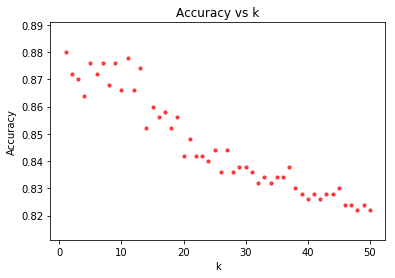

In [20]:
plt.scatter(k_grid,accs,c='red',marker='o',s=10,alpha=0.7)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

#### KNN의 매개변수 최적화:

In [21]:
k_grid = np.arange(1,51,1)
weights = ['uniform','distance']
parameters = {'n_neighbors':k_grid, 'weights':weights}

In [22]:
gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=10)
gridCV.fit(X_train, Y_train);
best_k = gridCV.best_params_['n_neighbors']
best_w = gridCV.best_params_['weights']

In [23]:
print("Best k : " + str(best_k))
print("Best weight : " + best_w)

Best k : 4
Best weight : distance


In [24]:
knn_best = KNeighborsClassifier(n_neighbors=best_k, weights = best_w)
knn_best.fit(X_train, Y_train);
Y_pred = knn_best.predict(X_test)
print( "Best Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Best Accuracy : 0.888


In [25]:
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=3)
knn_best = KNeighborsClassifier(n_neighbors=best_k, weights = best_w)
knn_best.fit(X_train, Y_train);
Y_pred = knn_best.predict(X_test)
print( "Best Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

NameError: name 'PCA' is not defined